In [21]:
import numpy as np
import pandas as pd


In [46]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

class NaiveBayes:

    def __init__(self):
        self.priors = None
        self.means = None
        self.variances = None

    def fit(self, X, y):
        # Count how many classes we're going to have to predict
        # Note: unique labels is of type [0, 1, ..., L] # TODO - Check
        unique_labels = np.unique(y)
        n_unique_labels = len(unique_labels)
        n_observations = len(y)

        # Now build all the priors in a special array
        priors = np.zeros(shape=n_unique_labels)
        # Now compute the mean mu for every class l in 0 ... L
        means = np.zeros(shape=(len(X[0]), n_unique_labels))
        variances = np.zeros_like(means)
        idxs_cache = []

        for i, l in enumerate(unique_labels):
            idxs = np.where(y==l)
            idxs_cache.append(idxs[0])
            # Priors
            n_instances_class = len(y[idxs])
            priors[i] = n_instances_class / n_observations
            # Means
            means[:, i] = np.sum(X[idxs], axis=0) / n_instances_class
            # Variances
            variances[:, i] = np.std(X[idxs], axis=0)
            
        # Get the indices where y is of a certain label
        # TODO - Optimize loops using Numba (just add a jit no-python decorator)

        self.priors = priors
        self.means = means
        self.variances = variances

    def infer(self, x):
        # Compute a discriminant function over the classes
        deltas = np.zeros(shape=len(self.priors))

        for idx_l in range(len(self.priors)):
            delta_l = self.priors[idx_l]
            sum_log_likelihood = 0
            for idx_j in range(len(x)):
                sum_log_likelihood += np.log(self.variances[idx_j, idx_l])
                sum_log_likelihood += np.power(x[idx_j] - self.means[idx_j, idx_l], 2) / self.variances[idx_j, idx_l]

            delta_l -= 0.5 * sum_log_likelihood
            deltas[idx_l] = delta_l
        probs = softmax(deltas)
        return np.where(probs==max(probs))[0][0]

In [47]:
import pandas as pd
df = pd.read_csv('../Datasets/Iris.csv')

In [48]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
df.drop('Id', axis=1, inplace=True)

In [50]:
df.loc[df['Species']=='Iris-setosa', 'Species'] = 0
df.loc[df['Species']=='Iris-versicolor', 'Species'] = 1
df.loc[df['Species']=='Iris-virginica', 'Species'] = 2

In [51]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

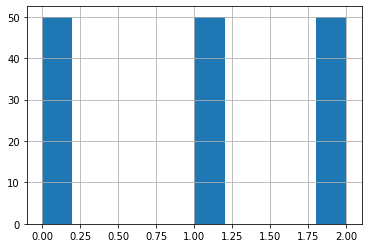

In [52]:
df['Species'].hist()

In [53]:
X = df.drop('Species', axis=1).values
y = df['Species'].values

In [54]:
n = NaiveBayes()

In [55]:
n.fit(X,y)

In [59]:
n.infer(np.array([4.9, 3. , 1.4, 0.2]))


0

In [60]:
# Now more interesting, find a bivariate input with bivariate output, and plot the decision boundaries

cov = np.array([
    [1,0],
    [0,1]
])

In [61]:
# Gaussian distribution n1
sample_1 = np.random.multivariate_normal(mean=np.array([1,2]), cov=cov, size=300)
y_1 = np.zeros(shape=len(sample_1[:, 0]))

In [62]:
sample_2 = np.random.multivariate_normal(mean=np.array([4,3]), cov=cov, size=300)
y_2 = np.ones(shape=len(sample_2[:,0]))



In [63]:
X = np.vstack((sample_1, sample_2))
y = np.hstack((y_1, y_2)).reshape(-1, 1)
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [64]:
X_y=np.concatenate((X,y), axis=1)

In [65]:
np.random.shuffle(X_y)

In [66]:
l = NaiveBayes()
l.fit(X_y[:, :-1], X_y[:, -1])

In [67]:
l.S.shape

AttributeError: 'NaiveBayes' object has no attribute 'S'

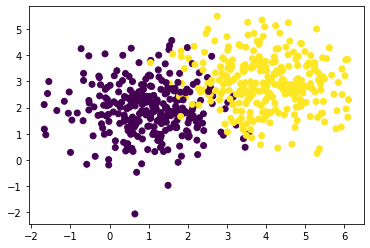

In [68]:
import matplotlib.pyplot as plt

# Let's look at the datapoints
plt.scatter(x= X_y[:, 0], y= X_y[:, 1], c=X_y[:, -1])


In [69]:
#On top of it plot the decision boundary created by the algorithm
sample_v = np.random.multivariate_normal(mean=np.array([3,3]), cov=cov, size=1500)
class_v = np.zeros(len(sample_v[:,0]))
for i in range(len(sample_v[:, 0])):
    class_v[i] = l.infer(sample_v[i, :])

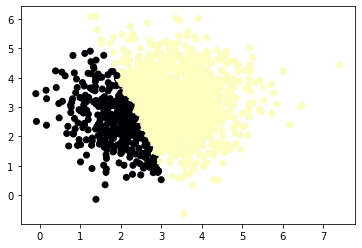

In [70]:
plt.scatter(x= sample_v[:, 0], y= sample_v[:, 1], c=class_v,cmap='magma')

